In [164]:
import pandas as pd
import numpy as np

data = pd.read_csv("dataAnnotated.csv", encoding="utf-8")

In [165]:
data = data.fillna(method="ffill")

In [82]:
data.tail(60)

,Line#,Word,Tag
345491,Line10058,ça,NoTag
345492,Line10058,existait,NoTag
345493,Line10058,"déjà,",NoTag
345494,Line10058,c',NoTag
345495,Line10058,était,NoTag
345496,Line10058,ce,NoTag
345497,Line10058,que,NoTag
345498,Line10058,j',NoTag
345499,Line10058,avais,NoTag
345500,Line10058,ajouté,NoTag


In [166]:
words = list(set(data["Word"].values))
n_words = len(words); n_words

35708

In [167]:
tags = list(set(data["Tag"].values))
n_tags = len(tags); n_tags

7

In [168]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w,t) for w,t in zip(s["Word"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Line#").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Line{}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [169]:
getter = SentenceGetter(data)
sen = getter.get_next()
print(sen)

[('est', 'NoTag'), ('certainement', 'NoTag'), ("aujourd'", 'NoTag'), ('hui', 'NoTag'), ('le', 'NoTag'), ('plus', 'NoTag'), ('éloigné', 'NoTag'), ('de', 'NoTag'), ('nous.', 'NoTag'), ('Plus', 'NoTag'), ("qu'", 'NoTag'), ('aucun', 'NoTag'), ('des', 'NoTag'), ('grands', 'NoTag'), ('écrivains,', 'NoTag'), ('il', 'NoTag'), ('appartient', 'NoTag'), ('à', 'NoTag'), ('son', 'NoTag'), ('temps', 'NoTag'), ('et', 'NoTag'), ('ne', 'NoTag'), ('le', 'NoTag'), ('dépasse', 'NoTag'), ('guère.', 'NoTag'), ('Il', 'NoTag'), ('incarne', 'NoTag'), ('les', 'NoTag'), ('idées,', 'NoTag'), ('les', 'NoTag'), ('sentiments', 'NoTag'), ('de', 'NoTag'), ('son', 'NoTag'), ('époque', 'NoTag'), ('sans', 'NoTag'), ('jamais', 'NoTag'), ('les', 'NoTag'), ('dominer', 'NoTag'), ('-', 'NoTag'), ('autrement', 'NoTag'), ('que', 'NoTag'), ('par', 'NoTag'), ('la', 'NoTag'), ('beauté', 'NoTag'), ('de', 'NoTag'), ('son', 'NoTag'), ('style.', 'NoTag'), ('Que', 'NoTag'), ('dis-je?', 'NoTag'), ('Ce', 'NoTag'), ('ne', 'NoTag'), ('sont

In [170]:
getter = SentenceGetter(data)
sentences = getter.sentences
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
idx2word = {i: w for w, i in word2idx.items()}
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

In [172]:
max_len = 75
max_len_char = 20

In [173]:
from keras.preprocessing.sequence import pad_sequences
X_word = [[word2idx[w[0]] for w in s] for s in sentences]
X_word = pad_sequences(maxlen=max_len, sequences=X_word, value=word2idx["PAD"], padding='post', truncating='post')
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)
print(n_chars)
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1
char2idx["PAD"] = 0
X_char = []
for sentence in sentences:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char.append(np.array(sent_seq))

125


In [174]:
y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')


We split in train and test set.

In [175]:
from sklearn.model_selection import train_test_split
X_word_tr, X_word_te, y_tr, y_te = train_test_split(X_word, y, test_size=0.1, random_state=2018)
X_char_tr, X_char_te, _, _ = train_test_split(X_char, y, test_size=0.1, random_state=2018)

In [176]:
from keras.models import Model,Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D
n_words +=20
n_chars +=20

In [177]:
# input and embedding for words
word_in = Input(shape=(max_len,))
emb_word = Embedding(input_dim=n_words + 2, output_dim=20,
                     input_length=max_len, mask_zero=True)(word_in)

# input and embeddings for characters
char_in = Input(shape=(max_len, max_len_char,))
emb_char = TimeDistributed(Embedding(input_dim=n_chars + 2, output_dim=10,
                           input_length=max_len_char, mask_zero=True))(char_in)
# character LSTM to get word encodings by characters
char_enc = TimeDistributed(LSTM(units=20, return_sequences=False,
                                recurrent_dropout=0.5))(emb_char)

# main LSTM
x = concatenate([emb_word, char_enc])
x = SpatialDropout1D(0.3)(x)
main_lstm = Bidirectional(LSTM(units=50, return_sequences=True,
                               recurrent_dropout=0.6))(x)
out = TimeDistributed(Dense(n_tags + 1, activation="sigmoid"))(main_lstm)

model = Model([word_in, char_in], out)


In [178]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 75, 20)]     0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 75)]         0                                            
__________________________________________________________________________________________________
time_distributed_6 (TimeDistrib (None, 75, 20, 10)   1470        input_6[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 75, 20)       714600      input_5[0][0]                    
_______________________________________________________________________________________

In [179]:
history2 = model.fit([X_word_tr,
                     np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))],
                    np.array(y_tr).reshape(len(y_tr), max_len, 1),
                    batch_size=32, epochs=10, validation_split=0.1, verbose=1)


Epoch 1/10
255/255 [==============================] - 58s 229ms/step - loss: 0.1230 - acc: 0.9608 - val_loss: 0.0417 - val_acc: 0.9668
Epoch 2/10
255/255 [==============================] - 58s 229ms/step - loss: 0.0384 - acc: 0.9660 - val_loss: 0.0336 - val_acc: 0.9668
Epoch 3/10
255/255 [==============================] - 56s 221ms/step - loss: 0.0312 - acc: 0.9661 - val_loss: 0.0265 - val_acc: 0.9669
Epoch 4/10
255/255 [==============================] - 56s 220ms/step - loss: 0.0229 - acc: 0.9753 - val_loss: 0.0152 - val_acc: 0.9904
Epoch 5/10
255/255 [==============================] - 56s 221ms/step - loss: 0.0117 - acc: 0.9921 - val_loss: 0.0099 - val_acc: 0.9924
Epoch 6/10
255/255 [==============================] - 64s 251ms/step - loss: 0.0076 - acc: 0.9942 - val_loss: 0.0078 - val_acc: 0.9936
Epoch 7/10
255/255 [==============================] - 64s 252ms/step - loss: 0.0057 - acc: 0.9955 - val_loss: 0.0070 - val_acc: 0.9933
Epoch 8/10
255/255 [==============================] - 5

In [180]:
hist2 = pd.DataFrame(history2.history)

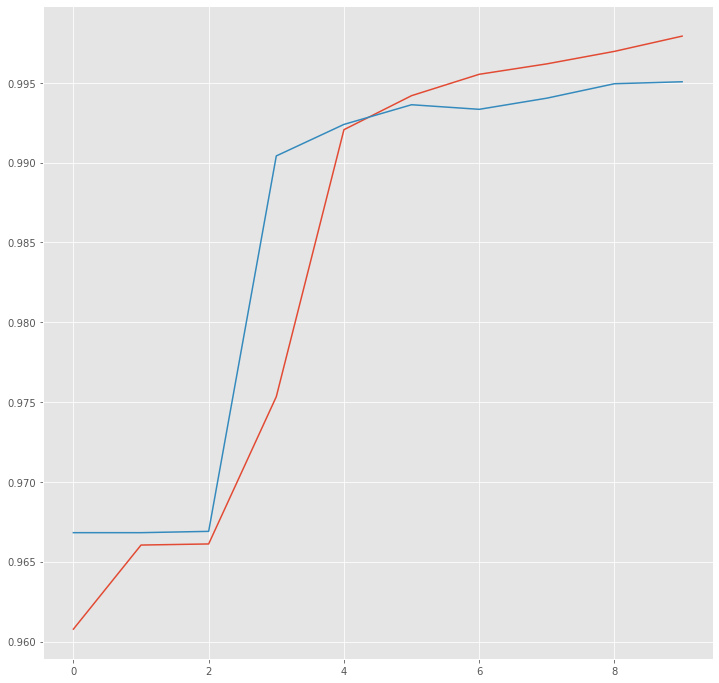

In [181]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist2["acc"])
plt.plot(hist2["val_acc"])
plt.show()

In [182]:
y_pred = model.predict([X_word_te,
                        np.array(X_char_te).reshape((len(X_char_te),
                                                     max_len, max_len_char))])

In [183]:
for i in range(1000) : 
    p = np.argmax(y_pred[i], axis=-1)
    print(
        "{:15}||{:5}||{}".format("Word", "True", "Pred"))
    print(30 * "=")
    for w, t, pred in zip(X_word_te[i], y_te[i], p):
        if w != 0:
                print("{:15}: {:5} {}".format(idx2word[w], idx2tag[t], idx2tag[pred]))

Word           ||True ||Pred
sont           : NoTag NoTag
particulièrement: NoTag NoTag
denses         : NoTag NoTag
et             : NoTag NoTag
bien           : NoTag NoTag
écrites.       : NoTag NoTag
Elles          : NoTag NoTag
offrent        : NoTag NoTag
de             : NoTag NoTag
plus           : NoTag NoTag
l'             : NoTag NoTag
avantage       : NoTag NoTag
d'             : NoTag NoTag
avoir          : NoTag NoTag
une            : NoTag NoTag
signification  : NoTag NoTag
générale.      : NoTag NoTag
Je             : NoTag NoTag
veux           : NoTag NoTag
dire           : NoTag NoTag
par            : NoTag NoTag
là             : NoTag NoTag
qu'            : NoTag NoTag
elles          : NoTag NoTag
offrent        : NoTag NoTag
des            : NoTag NoTag
images         : NoTag NoTag
de‧la          : NoTag NoTag
vie            : NoTag NoTag
qui            : NoTag NoTag
ont            : NoTag NoTag
un             : NoTag NoTag
sens           : NoTag NoTag
et           

ne             : NoTag NoTag
l'             : NoTag NoTag
est            : NoTag NoTag
aujourd'       : NoTag NoTag
hui,           : NoTag NoTag
elle           : NoTag NoTag
s'             : NoTag NoTag
honorerait     : NoTag NoTag
elle-même      : NoTag NoTag
en             : NoTag NoTag
comblant       : NoTag NoTag
Marguerite Yourcenar: AUTHORS AUTHORS
Word           ||True ||Pred
et             : NoTag NoTag
Ariane         : PERSONNAGES PERSONNAGES
Word           ||True ||Pred
Plus           : NoTag NoTag
révélatrice    : NoTag NoTag
et             : NoTag NoTag
plus           : NoTag NoTag
fructueuse     : NoTag NoTag
apparaît       : NoTag NoTag
cependant      : NoTag NoTag
une            : NoTag NoTag
confrontation  : NoTag NoTag
de‧l'          : NoTag NoTag
enchaînement   : NoTag NoTag
des            : NoTag NoTag
épisodes       : NoTag NoTag
du             : NoTag NoTag
roman          : NoTag NoTag
avec           : NoTag NoTag
le             : NoTag NoTag
mouvement      : NoTag

nom            : NoTag NoTag
Érasme,        : NoTag NoTag
Machiavel      : NoTag NoTag
ou             : NoTag NoTag
sainte         : NoTag NoTag
Élisabeth      : NoTag NoTag
de             : NoTag NoTag
Hongrie        : NoTag NoTag
France de Louis XIV: LIEUX AUTHORS
Word           ||True ||Pred
interrogé      : NoTag NoTag
par            : NoTag NoTag
son            : NoTag NoTag
ami            : NoTag NoTag
d'             : NoTag NoTag
enfance        : NoTag NoTag
François       : NoTag NoTag
Bondy.         : NoTag NoTag
Le             : NoTag NoTag
romancier      : NoTag NoTag
de‧L'          : NoTag NoTag
Education      : NoTag NoTag
européenne     : NoTag NoTag
n'             : NoTag NoTag
est            : NoTag NoTag
plus,          : NoTag NoTag
m'             : NoTag NoTag
a-t-il         : NoTag NoTag
dit,           : NoTag NoTag
européen,      : NoTag NoTag
aventurier     : NoTag NoTag
des            : NoTag NoTag
Racines        : NoTag NoTag
du             : NoTag NoTag
ciel    

publication    : NoTag NoTag
de‧l'          : NoTag NoTag
ensemble       : NoTag NoTag
de             : NoTag NoTag
ce             : NoTag NoTag
corpus         : NoTag NoTag
épistolaire    : NoTag NoTag
(bon           : NoTag NoTag
nombre         : NoTag NoTag
de             : NoTag NoTag
ses            : NoTag NoTag
lettres        : NoTag NoTag
sont           : NoTag NoTag
encore         : NoTag NoTag
sous           : NoTag NoTag
scellés        : NoTag NoTag
pendant        : NoTag NoTag
cinquante      : NoTag NoTag
ans,           : NoTag NoTag
et             : NoTag NoTag
sa             : NoTag NoTag
correspondance : NoTag NoTag
croisée        : NoTag NoTag
reste          : NoTag NoTag
inédite        : NoTag NoTag
à              : NoTag NoTag
ce             : NoTag NoTag
jour),         : NoTag NoTag
l'             : NoTag NoTag
anthologie     : NoTag NoTag
proposée       : NoTag NoTag
par            : NoTag NoTag
Michèle        : NoTag NoTag
Sarde          : NoTag NoTag
(qui          

ARCHIVES       : NoTag NoTag
DU             : NoTag NoTag
NORD,          : NoTag NoTag
de             : NoTag NoTag
Marguerite Yourcenar: AUTHORS AUTHORS
.              : NoTag NoTag
Gallimard,     : NoTag NoTag
384            : NoTag NoTag
pages,         : NoTag NoTag
54             : NoTag NoTag
F.             : NoTag NoTag
Word           ||True ||Pred
Marguerite Yourcenar: AUTHORS AUTHORS
Word           ||True ||Pred
se             : NoTag NoTag
fît            : NoTag NoTag
tour           : NoTag NoTag
à              : NoTag NoTag
tour           : NoTag NoTag
élève          : NoTag NoTag
de             : NoTag NoTag
Pindare        : OEUVRES OEUVRES
Word           ||True ||Pred
n'             : NoTag NoTag
atteignent     : NoTag NoTag
pas            : NoTag NoTag
la             : NoTag NoTag
grâce          : NoTag NoTag
et             : NoTag NoTag
la             : NoTag NoTag
souplesse      : NoTag NoTag
de             : NoTag NoTag
celles         : NoTag NoTag
de             : NoTa

du             : NoTag NoTag
musée          : NoTag NoTag
de             : NoTag NoTag
Naples         : LIEUX LIEUX
Word           ||True ||Pred
Phèdre         : PERSONNAGES PERSONNAGES
Word           ||True ||Pred
la             : NoTag NoTag
faveur         : NoTag NoTag
d'             : NoTag NoTag
un             : NoTag NoTag
discours       : NoTag NoTag
de             : NoTag NoTag
réception      : NoTag NoTag
à              : NoTag NoTag
l'             : NoTag NoTag
Académie       : NoTag NoTag
française      : NoTag NoTag
allégé         : NoTag NoTag
de             : NoTag NoTag
son            : NoTag NoTag
remerciement   : NoTag NoTag
et             : NoTag NoTag
Borges         : AUTHORS AUTHORS
Word           ||True ||Pred
et             : NoTag NoTag
aux            : NoTag NoTag
Mémoires       : OEUVRES OEUVRES
Word           ||True ||Pred
In             : NoTag NoTag
La             : NoTag NoTag
Nouvelle Revue : INSTITUTIONS INSTITUTIONS
des            : NoTag NoTag
deux     

ces            : NoTag NoTag
quelques       : NoTag NoTag
pages          : NoTag NoTag
sur            : NoTag NoTag
la             : NoTag NoTag
conversation   : NoTag NoTag
à              : NoTag NoTag
Innsbrück      : LIEUX PERSONNAGES
Word           ||True ||Pred
omme           : NoTag NoTag
le             : NoTag NoTag
Balzac de Catherine de Médicis: AUTHORS NoTag
.              : NoTag NoTag
Leur           : NoTag NoTag
sort           : NoTag NoTag
commun         : NoTag NoTag
est            : NoTag NoTag
de             : NoTag NoTag
s'             : NoTag NoTag
ébattre        : NoTag NoTag
dans           : NoTag NoTag
un             : NoTag NoTag
certain        : NoTag NoTag
exotisme       : NoTag NoTag
du             : NoTag NoTag
passé.         : NoTag NoTag
Word           ||True ||Pred
,              : NoTag NoTag
le             : NoTag NoTag
livre          : NoTag NoTag
n'             : NoTag NoTag
est            : NoTag NoTag
pas            : NoTag NoTag
difficile.     : NoT

Mais           : NoTag NoTag
pour           : NoTag NoTag
Entre          : NoTag NoTag
les            : NoTag NoTag
actes,         : NoTag NoTag
sans           : NoTag NoTag
doute          : NoTag NoTag
l'             : NoTag NoTag
ouvrage        : NoTag NoTag
le             : NoTag NoTag
plus           : NoTag NoTag
important      : NoTag NoTag
de‧la          : NoTag NoTag
romancière,    : NoTag NoTag
on             : NoTag NoTag
a              : NoTag NoTag
conservé       : NoTag NoTag
le             : NoTag NoTag
travail        : NoTag NoTag
de             : NoTag NoTag
Charles        : NoTag NoTag
Cestre,        : NoTag NoTag
d'             : NoTag NoTag
autant         : NoTag NoTag
plus           : NoTag NoTag
désastreux     : NoTag NoTag
qu'            : NoTag NoTag
il             : NoTag NoTag
avait,         : NoTag NoTag
et             : NoTag NoTag
fort           : NoTag NoTag
mal,           : NoTag NoTag
transcrit      : NoTag NoTag
au             : NoTag NoTag
présent       

Entretien      : NoTag NoTag
avec           : NoTag NoTag
Constantin Dimaras: PERSONNAGES PERSONNAGES
Word           ||True ||Pred
Pourtant,      : NoTag NoTag
celle          : NoTag NoTag
qui,           : NoTag NoTag
à              : NoTag NoTag
vingt-six      : NoTag NoTag
ans,           : NoTag NoTag
prendra        : NoTag NoTag
le             : NoTag NoTag
nom            : NoTag NoTag
de             : NoTag NoTag
Marguerite Yourcenar: AUTHORS AUTHORS
Word           ||True ||Pred
était          : NoTag NoTag
« à            : NoTag NoTag
feu            : NoTag NoTag
et             : NoTag NoTag
à              : NoTag NoTag
sang »,        : NoTag NoTag
et             : NoTag NoTag
la             : NoTag NoTag
religion       : NoTag NoTag
apportait,     : NoTag NoTag
comme          : NoTag NoTag
la             : NoTag NoTag
peste,         : NoTag NoTag
« un           : NoTag NoTag
âcre           : NoTag NoTag
et             : NoTag NoTag
dangereux      : NoTag NoTag
ferment        : No

Mademoiselle de Crayencour: AUTHORS CRITIQUES
Word           ||True ||Pred
31             : NoTag NoTag
Tous           : NoTag NoTag
les            : NoTag NoTag
ouvrages       : NoTag NoTag
cités          : NoTag NoTag
de             : NoTag NoTag
Marguerite Yourcenar: AUTHORS AUTHORS
Word           ||True ||Pred
lorsque        : NoTag NoTag
celui-ci       : NoTag NoTag
sera           : NoTag NoTag
parvenu        : NoTag NoTag
à              : NoTag NoTag
l'             : NoTag NoTag
arracher       : NoTag NoTag
à              : NoTag NoTag
la             : NoTag NoTag
mort.          : NoTag NoTag
C'             : NoTag NoTag
est            : NoTag NoTag
peine          : NoTag NoTag
perdue,        : NoTag NoTag
d'             : NoTag NoTag
ailleurs.      : NoTag NoTag
Hercule        : NoTag NoTag
est            : NoTag NoTag
tout           : NoTag NoTag
d'             : NoTag NoTag
une            : NoTag NoTag
pièce,         : NoTag NoTag
il             : NoTag NoTag
se             : 

Jean-Louis Ezine: CRITIQUES CRITIQUES
Word           ||True ||Pred
de             : NoTag NoTag
toute          : NoTag NoTag
sémiologie ;   : NoTag NoTag
elle           : NoTag NoTag
n'             : NoTag NoTag
en             : NoTag NoTag
déniche        : NoTag NoTag
pas            : NoTag NoTag
moins,         : NoTag NoTag
sous           : NoTag NoTag
nos            : NoTag NoTag
banals         : NoTag NoTag
matérialismes  : NoTag NoTag
et             : NoTag NoTag
nos            : NoTag NoTag
criminelles    : NoTag NoTag
paresses,      : NoTag NoTag
lés            : NoTag NoTag
signes         : NoTag NoTag
qui            : NoTag NoTag
menacent       : NoTag NoTag
en             : NoTag NoTag
profondeur     : NoTag NoTag
la             : NoTag NoTag
vie            : NoTag NoTag
de             : NoTag NoTag
notre          : NoTag NoTag
espèce,        : NoTag NoTag
la             : NoTag NoTag
vie            : NoTag NoTag
tout           : NoTag NoTag
court          : NoTag NoTag
Mémoi

d'             : NoTag NoTag
une            : NoTag NoTag
rigoureuse     : NoTag NoTag
précision.     : NoTag NoTag
Parce          : NoTag NoTag
que,           : NoTag NoTag
malgré         : NoTag NoTag
tout,          : NoTag NoTag
il             : NoTag NoTag
y              : NoTag NoTag
a              : NoTag NoTag
parfois        : NoTag NoTag
quelque        : NoTag NoTag
chose          : NoTag NoTag
qui            : NoTag NoTag
échappe,       : NoTag NoTag
comme          : NoTag NoTag
le             : NoTag NoTag
léger          : NoTag NoTag
mouvement      : NoTag NoTag
d'             : NoTag NoTag
un             : NoTag NoTag
cil            : NoTag NoTag
vibratile      : NoTag NoTag
à              : NoTag NoTag
la             : NoTag NoTag
frange         : NoTag NoTag
des            : NoTag NoTag
mots           : NoTag NoTag
vivants,       : NoTag NoTag
la             : NoTag NoTag
traduction     : NoTag NoTag
accentue       : NoTag NoTag
un             : NoTag NoTag
peu           

« la           : NoTag NoTag
maîtrise       : NoTag NoTag
Word           ||True ||Pred
Que            : NoTag NoTag
les            : NoTag NoTag
lecteurs       : NoTag NoTag
qui            : NoTag NoTag
connaissent    : NoTag NoTag
surtout        : NoTag NoTag
Mme Yourcenar  : AUTHORS AUTHORS
Word           ||True ||Pred
offre          : NoTag NoTag
l'             : NoTag NoTag
aspect         : NoTag NoTag
d'             : NoTag NoTag
un             : NoTag NoTag
Bouddha        : PERSONNAGES PERSONNAGES
méditatif      : NoTag NoTag
et             : NoTag NoTag
un             : NoTag NoTag
peu            : NoTag NoTag
américain.     : NoTag NoTag
De             : NoTag NoTag
profil,        : NoTag NoTag
elle           : NoTag NoTag
ressemble      : NoTag NoTag
surtout        : NoTag NoTag
à              : NoTag NoTag
une            : NoTag NoTag
impératrice    : NoTag NoTag
romaine        : NoTag NoTag
avec           : NoTag NoTag
ce             : NoTag NoTag
que            : NoTag NoTa

Gracq,         : NoTag NoTag
avec           : NoTag NoTag
quelques       : NoTag NoTag
autres,        : NoTag NoTag
peu            : NoTag NoTag
nombreux,      : NoTag NoTag
la             : NoTag NoTag
littérature    : NoTag NoTag
française      : NoTag NoTag
d'             : NoTag NoTag
aujourd'       : NoTag NoTag
hui,           : NoTag NoTag
vit            : NoTag NoTag
loin           : NoTag NoTag
de             : NoTag NoTag
tout           : NoTag NoTag
tapage         : NoTag NoTag
et             : NoTag NoTag
de             : NoTag NoTag
toute          : NoTag NoTag
publicité.     : NoTag NoTag
Il             : NoTag NoTag
n'             : NoTag NoTag
est            : NoTag NoTag
même           : NoTag NoTag
pas            : NoTag NoTag
permis         : NoTag NoTag
de             : NoTag NoTag
dire           : NoTag NoTag
qu'            : NoTag NoTag
elle           : NoTag NoTag
traduit        : NoTag NoTag
les            : NoTag NoTag
tendances      : NoTag NoTag
contemporaines

espagnole      : NoTag NoTag
à              : NoTag NoTag
la             : NoTag NoTag
fin            : NoTag NoTag
du             : NoTag NoTag
xvie           : NoTag NoTag
siècle,        : NoTag NoTag
toile          : NoTag NoTag
de             : NoTag NoTag
fond           : NoTag NoTag
à              : NoTag NoTag
la             : NoTag NoTag
passion        : NoTag NoTag
incestueuse    : NoTag NoTag
d'             : NoTag NoTag
Anna,          : NoTag NoTag
soror... ;     : NoTag NoTag
ou             : NoTag NoTag
bien           : NoTag NoTag
tableautins    : NoTag NoTag
tantôt         : NoTag NoTag
douloureusement: NoTag NoTag
intimes,       : NoTag NoTag
tantôt         : NoTag NoTag
plus           : NoTag NoTag
allègres       : NoTag NoTag
d'             : NoTag NoTag
Un             : NoTag NoTag
homme          : NoTag NoTag
obscur         : NoTag NoTag
—              : NoTag NoTag
qui            : NoTag NoTag
ne             : NoTag NoTag
sont           : NoTag NoTag
pas           

Mémoires       : OEUVRES OEUVRES
Word           ||True ||Pred
,              : NoTag NoTag
pour           : NoTag NoTag
écouter        : NoTag NoTag
les            : NoTag NoTag
opéras         : NoTag NoTag
wagnériens.    : NoTag NoTag
Par            : NoTag NoTag
son            : NoTag NoTag
père           : NoTag NoTag
aussi,         : NoTag NoTag
Mme Marguerite Yourcenar: AUTHORS AUTHORS
Word           ||True ||Pred
Nul            : NoTag NoTag
n'             : NoTag NoTag
ignore         : NoTag NoTag
que            : NoTag NoTag
ses            : NoTag NoTag
randonnées     : NoTag NoTag
à              : NoTag NoTag
travers        : NoTag NoTag
l'             : NoTag NoTag
Europe         : LIEUX LIEUX
Word           ||True ||Pred
du             : NoTag NoTag
Vain           : NoTag NoTag
Combat         : NoTag NoTag
par            : NoTag NoTag
Marg           : NoTag NoTag
Yourcenar      : NoTag NoTag
Traité du Vain Combat: OEUVRES OEUVRES
Word           ||True ||Pred
,              :

Lectrice       : NoTag NoTag
imprégnée      : NoTag NoTag
de             : NoTag NoTag
Proust         : AUTHORS AUTHORS
Word           ||True ||Pred
Lorsqu'        : NoTag NoTag
on             : NoTag NoTag
donnait        : NoTag NoTag
Thétis         : PERSONNAGES PERSONNAGES
Word           ||True ||Pred
Car            : NoTag NoTag
les            : NoTag NoTag
romans         : NoTag NoTag
historiques    : NoTag NoTag
de             : NoTag NoTag
Marguerite Yourcenar: AUTHORS AUTHORS
Word           ||True ||Pred
Sa             : NoTag NoTag
fortune,       : NoTag NoTag
d'             : NoTag NoTag
ailleurs,      : NoTag NoTag
s'             : NoTag NoTag
incarne.       : NoTag NoTag
Elle           : NoTag NoTag
prend          : NoTag NoTag
la             : NoTag NoTag
forme          : NoTag NoTag
pure           : NoTag NoTag
d'             : NoTag NoTag
un             : NoTag NoTag
adolescent.    : NoTag NoTag
Il             : NoTag NoTag
chérit         : NoTag NoTag
Antinoüs       : P

et             : NoTag NoTag
publiées       : NoTag NoTag
à              : NoTag NoTag
l'             : NoTag NoTag
intention      : NoTag NoTag
d'             : NoTag NoTag
un             : NoTag NoTag
public         : NoTag NoTag
peu            : NoTag NoTag
familiarisé    : NoTag NoTag
avec           : NoTag NoTag
le             : NoTag NoTag
grec,          : NoTag NoTag
du             : NoTag NoTag
moins          : NoTag NoTag
à              : NoTag NoTag
ce             : NoTag NoTag
qu'            : NoTag NoTag
affirme        : NoTag NoTag
l'             : NoTag NoTag
auteur         : NoTag NoTag
avec           : NoTag NoTag
une            : NoTag NoTag
excessive      : NoTag NoTag
modestie.      : NoTag NoTag
En             : NoTag NoTag
fait,          : NoTag NoTag
l'             : NoTag NoTag
ouvrage        : NoTag NoTag
a              : NoTag NoTag
le             : NoTag NoTag
mérite         : NoTag NoTag
d'             : NoTag NoTag
ouvrir         : NoTag NoTag
de            

Blanchard,     : NoTag NoTag
de             : NoTag NoTag
Benjamin       : NoTag NoTag
Péret,         : NoTag NoTag
de             : NoTag NoTag
Jules          : NoTag NoTag
Supervielle,   : NoTag NoTag
de             : NoTag NoTag
Max            : NoTag NoTag
Ernst,         : NoTag NoTag
de             : NoTag NoTag
Jean           : NoTag NoTag
Dubuffet       : NoTag NoTag
et             : NoTag NoTag
de             : NoTag NoTag
beaucoup       : NoTag NoTag
d'             : NoTag NoTag
autres         : NoTag NoTag
et             : NoTag NoTag
pour           : NoTag NoTag
nous,          : NoTag NoTag
le             : NoTag NoTag
premier        : NoTag NoTag
livre          : NoTag NoTag
parle          : NoTag NoTag
aussi          : NoTag NoTag
de‧l'          : NoTag NoTag
auteur         : NoTag NoTag
des            : NoTag NoTag
Mémoires       : NoTag NoTag
d'             : NoTag NoTag
Hadrien,       : NoTag NoTag
le             : NoTag NoTag
second         : NoTag NoTag
de            

In [184]:
#save_model
from keras.backend import manual_variable_initialization
manual_variable_initialization(True)

model.save_weights('model.h5')
model_json = model.to_json()
with open('model.json', "w") as json_file:
    json_file.write(model_json)
json_file.close()


INFO:tensorflow:Assets written to: saved_model\assets


In [185]:
#reload_model
from keras.models import model_from_json
json_file = open("model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model.h5")

In [203]:
#s="mais aussi misère des gueux privés de travail qui brisent les machines à tisser inventées par Zénon et demandent vainement grâce au drapier qui se propose de les pendre."   
s="Ce livre est érit par"
s = s.split(" ")
s.append("Mme Marguerite Yourcenar")
s.append("en")
s.append("Italie")
for w in s :
    if w not in words : 
        words.append(w)
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
idx2word = {i: w for w, i in word2idx.items()}
chars = set([w_i for w in words for w_i in w])
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1
char2idx["PAD"] = 0

In [204]:
print(s)
x_test_sent = pad_sequences(sequences=[[word2idx[w] for w in s]],
                            padding="post", truncating='post', value=word2idx["PAD"], maxlen=max_len)

['Ce', 'livre', 'est', 'érit', 'par', 'Mme Marguerite Yourcenar', 'en', 'Italie']


In [205]:
x_char_test =  []
sentence = s
sent_seq = []
for i in range(max_len):
    word_seq = []
    for j in range(max_len_char):
        try:
            word_seq.append(char2idx.get(sentence[i][j]))
        except:
            word_seq.append(char2idx.get("PAD"))
    sent_seq.append(word_seq)
x_char_test=np.array([sent_seq])

In [206]:
tmp_word = x_test_sent
tmp_char = x_char_test
p = model.predict([tmp_word,tmp_char.reshape((len(tmp_char),max_len, max_len_char))])
p = np.argmax(p[0], axis=-1)
print("{:15}||{}".format("Word", "Prediction"))
print(30 * "=")
for w, pred in zip(tmp_word[0], p):
    if w != 0:
            print("{:15}: {}".format(idx2word[w], idx2tag[pred]))

Word           ||Prediction
Ce             : NoTag
livre          : NoTag
est            : NoTag
érit           : NoTag
par            : NoTag
Mme Marguerite Yourcenar: AUTHORS
en             : NoTag
Italie         : LIEUX
